# Coverage plots

In [1]:
%matplotlib inline  
import numpy as np
from matplotlib import pyplot as plt

Let us consider the following function which applies a linear model to the given data. 
Specifically, given a "model" vector containing the model coefficients $(a,b)$ and a $n \times 2$ "data" matrix  containing the data points to be classified, the function outputs a vector $\mathbf{z}$, $|\mathbf{z}| = n$ of booleans where $z_i$ is `True` if $a \cdot x_{i,1} + b \cdot x_{i,2} \geq 0$, it is `False` otherwise.

In [2]:
def apply_linear_model(model, data):
    return np.dot(data, np.transpose(model)) > 0

Let us define `data` by generating $1000$ points drawn uniformly from $\mathcal{X} = [-100,100]^2$.

In [3]:
data = (np.random.rand(1000,2) - 0.5) * 200
data

array([[-51.66982863,  87.11940487],
       [-94.45007442, -93.97540608],
       [-68.24839747, -15.76857108],
       ..., 
       [-68.57283317, -20.10334446],
       [-80.07527504, -78.09395208],
       [ 47.21809856,  10.87445523]])

and let target_labels be the labeling output by applying `apply_linear_model` with our target model: $4x -y > 0$

In [4]:
target_model = [4.,-1.]
target_labels = apply_linear_model(target_model, data)

By using matplotlib.pyplot module it is easy to plot the generated points onto a 2D plot:

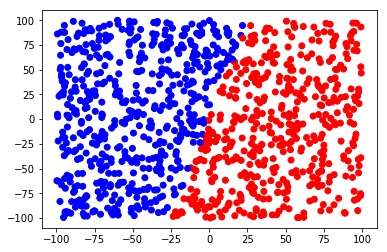

In [5]:
colors = ['r' if l else 'b' for l in target_labels]
plt.scatter(data[:,0], data[:,1], color=colors)

Finally let us now generate at random 100 linear models with coefficients in $[-5,5]$:

In [6]:
models = (np.random.rand(100,2) - 0.5) * 10

# Exercise

1. Write a function that, taken two list of labellings build the corresponding confusion matrix [[1](#hint1)];
1. For each model in `models` plot the [FP,TP] pairs on a scatter plot;
1. Just looking at the plot: which is the best model in the pool?
1. Find the model with the best accuracy [[2](#hint2)] and compare it with the target model, is it close? Is it the model you would have picked up visually from the scatter plot?
1. If everything is ok, you should have found a pretty good model for our data. It fits the data quite well and it is quite close to the target model. Did you expect this? If so, why? If not so, why not?

<a name="hint1">Hint 1:</a> it may be helpful to have a way to map TRUE to 0, FALSE to 1 and to use these values as indices in the confusion matrix. 

<a name="hint2">Hint 2:</a> one way to proceed is to build a function `accuracy`, use the `map` function to calculate the accuracies of all the models, and then apply the `numpy.argmax` to retrieve the index of the best model.

In [7]:
#Write a function that, taken two list of labellings build the corresponding confusion matrix
# create a confusion matrix 2x2 of the 2 label set
def confusion_matrix(y_true,y_pred):
    cf = np.matrix([[0,0],[0,0]])
    # closure on cf
    def indicator(y_true,y_pred):
        ind= int(y_true == y_pred)
        i = int(not y_true)# map TRUE to 0 and FALSE to 1
        cf[i,i]+=ind # RIGHT PREDICTION
        cf[i,abs(i-1)]+=abs(ind-1) # FALSE PREDICTION
        return
    # cf[0,0] - True positive
    # cf[0,1] - false negative
    # cf[1,0] - false positive
    # cf[1,1] - true negative
    #Apply function to every item of iterable and return a list of the results
    list(map(indicator,y_true,y_pred))
    return cf

print(confusion_matrix(target_labels,target_labels))# test confusion on the same set,should have 0 on the error diagonal

[[460   0]
 [  0 540]]


In [9]:
#For each model in models plot the [FP,TP] pairs on a scatter plot;
#For each model calcolate the FP and TP
def get_positive_acc(model):
    #print model
    """
    dato il model applica il modello lineare,
    calcola la matrice di confusione e ritorna
    """
    y_labels = apply_linear_model(model, data)
    cf_m = confusion_matrix(target_labels,y_labels)
    return np.array([ cf_m[1,0], cf_m[0,0]])

positive_acc =np.array( [get_positive_acc(m) for m in models])
#print(positive_acc)
#print positive_acc
#positive_acc= np.concatenate(positive_acc,axis=0)
#print positive_acc

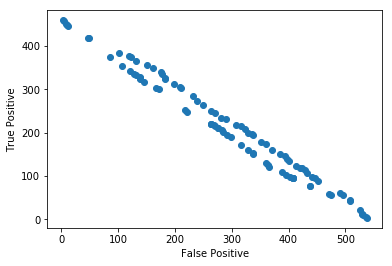

In [10]:
false_pos = positive_acc[:,0]
trure_pos =  positive_acc[:,1]
plt.scatter(false_pos,trure_pos)
plt.xlabel('False Positive')
plt.ylabel('True Positive')

The best model so far, by just looking at the scattered plot should be the one with the best number of true positive in the top left corner of the plot. To find it we just have to look at the index of the maximum.

In [11]:
max_tp = np.argmax(positive_acc[:,1])
#stampa il modello con il massimo punteggio
print (models[max_tp])
# print also the confusion matrix of the model
y_labels = apply_linear_model(models[max_tp], data)
#mostra la confusion matrix per il miglior punteggio
print (confusion_matrix(target_labels,y_labels))

[ 2.04801747 -0.49194262]
[[459   1]
 [  2 538]]


In [12]:
# it looks the number are lows on the error diagonal
# Find the model with the best accuracy [2] and compare it with the target model
from sklearn.metrics import accuracy_score
all_acc = [] #tutti gli accuracy score per modello
for model in models:
    y_labels = apply_linear_model(model, data)
    all_acc.append(accuracy_score(target_labels,y_labels))
acc_max = np.argmax(all_acc)
print( models[acc_max])

[ 2.04801747 -0.49194262]


In [13]:
print( 'The model with the best accuracy is also the model with the best number of true positive:')
print(max_tp == acc_max)

The model with the best accuracy is also the model with the best number of true positive:
True


The result could be expected because the distribution of positive sample and negative sample was very similiar(The scattered plot for the target model looks usually simmetrical).
If the negative distribution should have been a greater than the positive distribution. This could led to the True Negative and False Negative having a greater impact in the accuracy score of the model and so to incorrect guest by just looking at the number of true positive and false positive, of course under the assumption that both classes have the same relevance for the result.